In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv("Agrofood_co2_emission.csv")
data = data[data['Area'] == "India"]
data.drop(['Area'], axis=1, inplace=True)
data.set_index('Year', inplace=True)
columns=data.columns

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)


In [4]:
imp = SimpleImputer(strategy='mean')
data = imp.fit_transform(data)
data = pd.DataFrame(data, columns=columns)

In [5]:
y = data['total_emission']
X = data.drop(['total_emission'],axis=1)

In [6]:
def prin(i, X):
    pca = PCA(n_components=i)
    X = pca.fit_transform(X)
    X = pd.DataFrame(X)
    return X

In [15]:
lossList = []
def mm(Xnew):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,activation='relu',input_shape=(Xnew.shape[1],1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    X_train, X_test, y_train, y_test = train_test_split(Xnew,y, test_size=.20,random_state=0)
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
    X_train = tf.constant(X_train, dtype = tf.float64)
    model.fit(X_train,y_train,verbose=0,epochs=25,batch_size=128)
    losses=model.history.history
    return losses
    # print(losses['loss'][-1])

<Axes: >

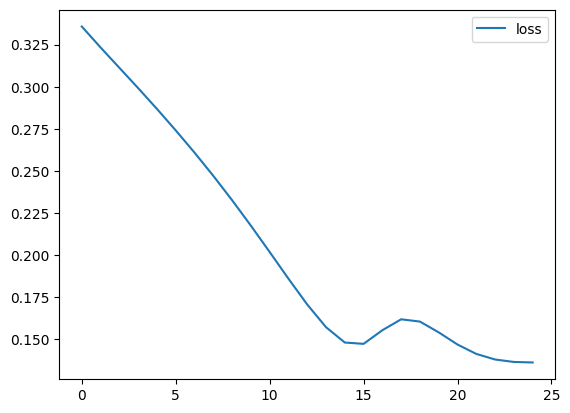

In [16]:
Xnew = prin(13, X)
l = mm(Xnew)
l = pd.DataFrame(l)
l.plot()

In [8]:
X.shape

(31, 28)

In [9]:
for i in range(1,28):
    Xnew = prin(i, X)
    mm(Xnew)

0.32490774989128113
0.2880176305770874
0.26293909549713135
0.25559982657432556
0.2511110007762909
0.2253314107656479
0.2555989623069763
0.23372673988342285
0.2243293970823288
0.24880170822143555
0.24296434223651886
0.22825537621974945
0.21270400285720825
0.21674291789531708
0.20672430098056793
0.23291563987731934
0.24001868069171906
0.21018655598163605
0.20346903800964355
0.23478908836841583
0.20489810407161713
0.2460450679063797
0.21260763704776764
0.21707899868488312
0.20481747388839722
0.2242531031370163
0.2207348793745041


In [10]:
lossList

[]